In [39]:
library(tidyverse)
library(sf)
library(terra)
library(ggplot2)
library(gridExtra)

In [40]:
shp_diri <- "/Users/xingbinghong/CCVPD/vpd range cmip6/IPCC-WGI-reference-regions-v4_shapefile"
shp_fili <- "IPCC-WGI-reference-regions-v4.shp"

In [41]:
# Read boundary vector data
shp_in<- st_read(paste0(shp_diri, "/", shp_fili), quiet = TRUE)
class(shp_in)

[1] "sf"         "data.frame"

In [42]:
# Extract the boundary CRS（Coordinate Reference System）
st_crs(shp_in)

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

In [43]:
# content of vector Data
field_names <- st_drop_geometry(shp_in)
summary(field_names)
head(field_names, 10)

  Continent             Type               Name             Acronym         
 Length:58          Length:58          Length:58          Length:58         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

,Continent,Type,Name,Acronym
,<chr>,<chr>,<chr>,<chr>
1,POLAR,Land,Greenland/Iceland,GIC
2,NORTH-AMERICA,Land,N.W.North-America,NWN
3,NORTH-AMERICA,Land,N.E.North-America,NEN
4,NORTH-AMERICA,Land,W.North-America,WNA
5,NORTH-AMERICA,Land,C.North-America,CNA
6,NORTH-AMERICA,Land,E.North-America,ENA
7,CENTRAL-AMERICA,Land,N.Central-America,NCA
8,CENTRAL-AMERICA,Land,S.Central-America,SCA
9,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR


In [44]:
#58 regions in the worls ,

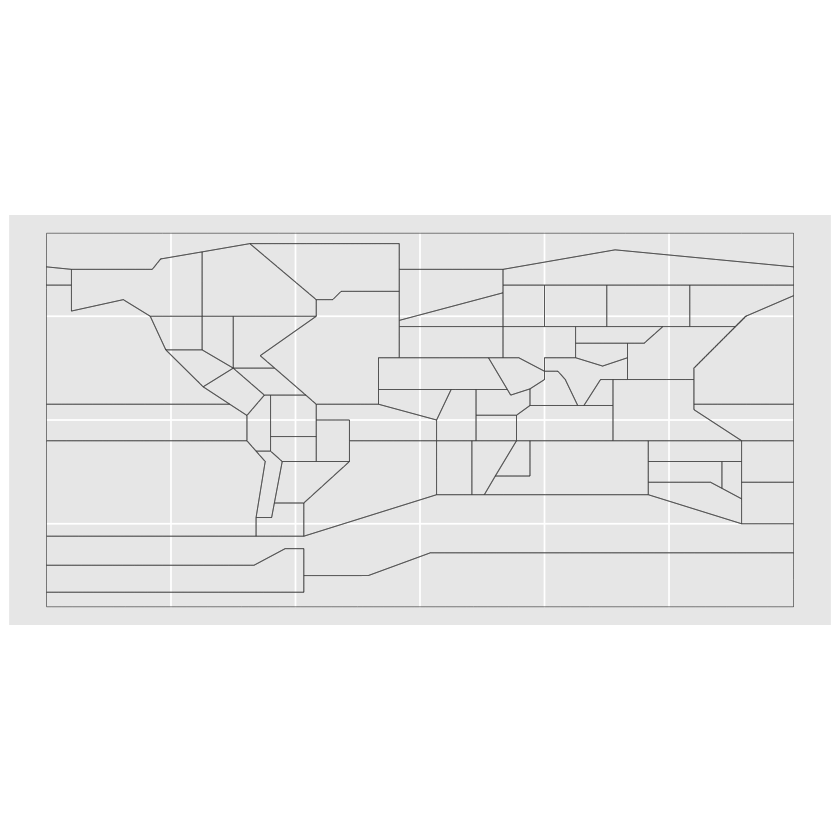

In [45]:
ggplot(data = shp_in) +
  geom_sf(fill = NA)

In [46]:
#read raster file function
readRasterFiles <- function(directory) {
  files <- list.files(directory, full.names = TRUE)
  for (file in files) {
    filename <- tools::file_path_sans_ext(basename(file))
    raster_data <- rast(file)
    names(raster_data) <- "delta_vpd"
    assign(filename, raster_data, envir = .GlobalEnv)
  }
}


In [47]:
# read raster data
vpd_diri <- "/Users/xingbinghong/CCVPD/vpd range cmip6/delta_vpd"
readRasterFiles(vpd_diri)

In [48]:
#extract The CRS of raster Data
print(vpd_delta_djf)

class       : SpatRaster 
dimensions  : 144, 192, 1  (nrow, ncol, nlyr)
resolution  : 1.875, 1.25  (x, y)
extent      : 0, 360, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source      : vpd_delta_djf.out 
name        :  delta_vpd 
min value   : -0.1628611 
max value   :  1.3571916 


In [49]:
print(vpd_delta_jja)

class       : SpatRaster 
dimensions  : 144, 192, 1  (nrow, ncol, nlyr)
resolution  : 1.875, 1.25  (x, y)
extent      : 0, 360, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source      : vpd_delta_jja.out 
name        :  delta_vpd 
min value   : -0.2263633 
max value   :  1.8551501 


In [50]:
print(vpd_delta_mam)

class       : SpatRaster 
dimensions  : 144, 192, 1  (nrow, ncol, nlyr)
resolution  : 1.875, 1.25  (x, y)
extent      : 0, 360, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source      : vpd_delta_mam.out 
name        :  delta_vpd 
min value   : -0.1369705 
max value   :  1.2528267 


In [51]:
print(vpd_delta_son)

class       : SpatRaster 
dimensions  : 144, 192, 1  (nrow, ncol, nlyr)
resolution  : 1.875, 1.25  (x, y)
extent      : 0, 360, -90, 90  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source      : vpd_delta_son.out 
name        :  delta_vpd 
min value   : -0.1223331 
max value   :  1.4972651 


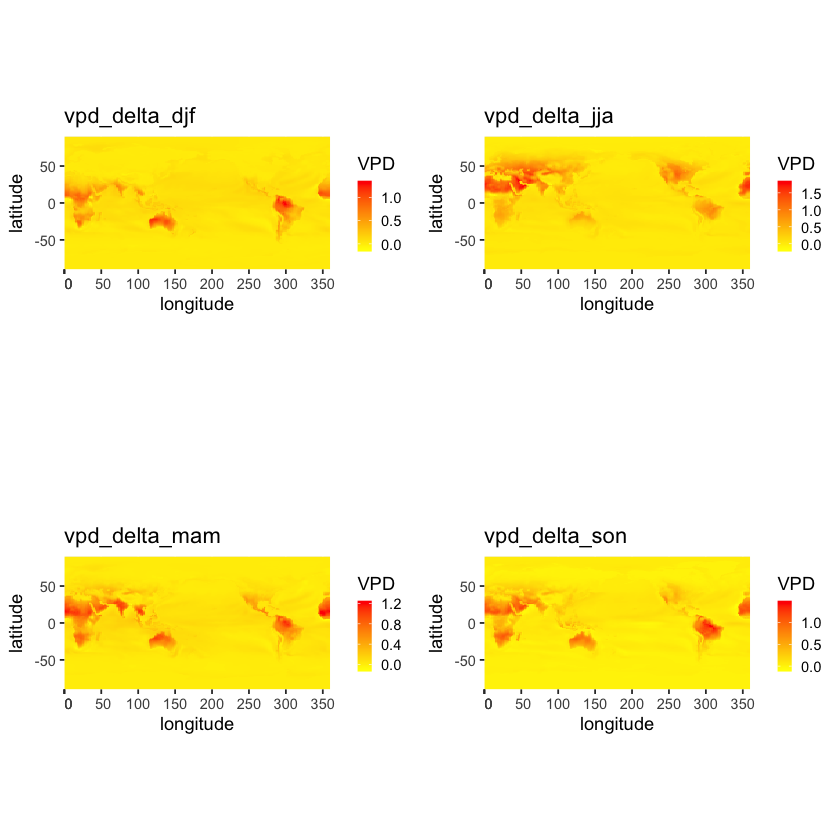

In [52]:
# Observe raster data distribution
source("/Users/xingbinghong/CCVPD/vpd range cmip6/scripts/rasterdf.R")
# Convert four raster data objects to data frame format
vpd_delta_djf_df <- rasterdf(vpd_delta_djf)
vpd_delta_jja_df <- rasterdf(vpd_delta_jja)
vpd_delta_mam_df <- rasterdf(vpd_delta_mam)
vpd_delta_son_df <- rasterdf(vpd_delta_son)
# plot
plot1 <- ggplot(data = vpd_delta_djf_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = value)) +
  scale_fill_gradient(name = "VPD", 
                      low = "yellow", 
                      high = "red") +
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_djf",
       x = "longitude", 
       y = "latitude") +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))

plot2 <- ggplot(data = vpd_delta_jja_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = value)) +
  scale_fill_gradient(name = "VPD", 
                      low = "yellow", 
                      high = "red") +
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_jja",
       x = "longitude", 
       y = "latitude") +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))

plot3 <- ggplot(data = vpd_delta_mam_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = value)) +
  scale_fill_gradient(name = "VPD", 
                      low = "yellow", 
                      high = "red") +
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_mam",
       x = "longitude", 
       y = "latitude") +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))

plot4 <- ggplot(data = vpd_delta_son_df) +
  geom_raster(aes(x = x, 
                  y = y, 
                  fill = value)) +
  scale_fill_gradient(name = "VPD", 
                      low = "yellow", 
                      high = "red") +
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_son",
       x = "longitude", 
       y = "latitude") +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))

# Combine four plots into one plot with 2 rows and 2 columns
grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)



In [53]:
#（zonal statictics = regrid?）
shp_in_ras <- rasterize(vect(shp_in), vpd_delta_djf, field = "Name")
# Convert vector data to raster data
summary(shp_in_ras)


              Name      
 E.Antarctica   : 2014  
 Southern-Ocean : 1833  
 Arctic-Ocean   : 1035  
 N.Pacific-Ocean:  792  
 Russian-Arctic :  759  
 (Other)        : 7391  
 NA's           :13824  

In [54]:
vpd_delta_djf_grid <- zonal(vpd_delta_djf,shp_in_ras,fun = "mean",na.rm = TRUE)
vpd_delta_jja_grid <- zonal(vpd_delta_jja,shp_in_ras,fun = "mean",na.rm = TRUE)
vpd_delta_mam_grid <- zonal(vpd_delta_mam,shp_in_ras,fun = "mean",na.rm = TRUE)
vpd_delta_son_grid <- zonal(vpd_delta_son,shp_in_ras,fun = "mean",na.rm = TRUE)

head(vpd_delta_djf_grid, 10)
summary(vpd_delta_djf_grid)

,Name,delta_vpd
,<chr>,<dbl>
1,Arabian-Peninsula,0.302366013
2,Arabian-Sea,0.140472830
3,Arctic-Ocean,0.032199164
4,Bay-of-Bengal,0.083641880
5,C.Australia,0.766339736
6,Central-Africa,0.518716509
7,E.Antarctica,0.005167947
8,E.Asia,0.048431541
9,E.Australia,0.225853917


     Name             delta_vpd       
 Length:40          Min.   :0.005168  
 Class :character   1st Qu.:0.030675  
 Mode  :character   Median :0.078875  
                    Mean   :0.145155  
                    3rd Qu.:0.225864  
                    Max.   :0.766340  

In [54]:
vpd_delta_djf_grid <- zonal(vpd_delta_djf,shp_in_ras,fun = "mean",na.rm = TRUE)
vpd_delta_jja_grid <- zonal(vpd_delta_jja,shp_in_ras,fun = "mean",na.rm = TRUE)
vpd_delta_mam_grid <- zonal(vpd_delta_mam,shp_in_ras,fun = "mean",na.rm = TRUE)
vpd_delta_son_grid <- zonal(vpd_delta_son,shp_in_ras,fun = "mean",na.rm = TRUE)

head(vpd_delta_djf_grid, 10)
summary(vpd_delta_djf_grid)

,Name,delta_vpd
,<chr>,<dbl>
1,Arabian-Peninsula,0.302366013
2,Arabian-Sea,0.140472830
3,Arctic-Ocean,0.032199164
4,Bay-of-Bengal,0.083641880
5,C.Australia,0.766339736
6,Central-Africa,0.518716509
7,E.Antarctica,0.005167947
8,E.Asia,0.048431541
9,E.Australia,0.225853917


     Name             delta_vpd       
 Length:40          Min.   :0.005168  
 Class :character   1st Qu.:0.030675  
 Mode  :character   Median :0.078875  
                    Mean   :0.145155  
                    3rd Qu.:0.225864  
                    Max.   :0.766340  

In [55]:
#visualization
shp_join1 <- left_join(shp_in, vpd_delta_djf_grid, by = "Name")
shp_join2 <- left_join(shp_in, vpd_delta_jja_grid, by = "Name")
shp_join3 <- left_join(shp_in, vpd_delta_mam_grid, by = "Name")
shp_join4 <- left_join(shp_in, vpd_delta_son_grid, by = "Name")

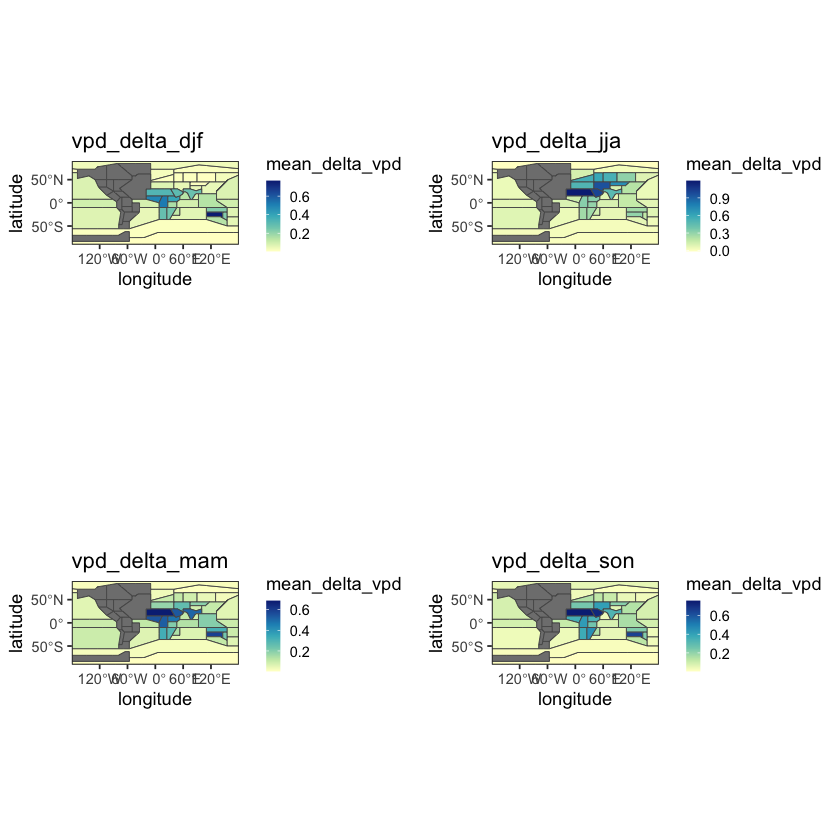

In [56]:
plot_join1 <- ggplot(data = shp_join1) +
  geom_sf(aes(fill = delta_vpd), size = 0.1) +  
  scale_fill_distiller(name = "mean_delta_vpd",
                       palette = "YlGnBu",
                       direction = 1)+
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_djf",
       x = "longitude", 
       y = "latitude") +
  theme_bw() +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))
plot_join2 <- ggplot(data = shp_join2) +
  geom_sf(aes(fill = delta_vpd), size = 0.1) +  
  scale_fill_distiller(name = "mean_delta_vpd",
                       palette = "YlGnBu",
                       direction = 1)+
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_jja",
       x = "longitude", 
       y = "latitude") +
  theme_bw() +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))
plot_join3 <- ggplot(data = shp_join3) +
  geom_sf(aes(fill = delta_vpd), size = 0.1) +  
  scale_fill_distiller(name = "mean_delta_vpd",
                       palette = "YlGnBu",
                       direction = 1)+
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_mam",
       x = "longitude", 
       y = "latitude") +
  theme_bw() +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))
plot_join4 <- ggplot(data = shp_join4) +
  geom_sf(aes(fill = delta_vpd), size = 0.1) +  
  scale_fill_distiller(name = "mean_delta_vpd",
                       palette = "YlGnBu",
                       direction = 1)+
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_son",
       x = "longitude", 
       y = "latitude") +
  theme_bw() +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))
grid.arrange(plot_join1, plot_join2, plot_join3, plot_join4, ncol = 2)


In [58]:
#use the median of delta vpd
vpd_delta_djf_grid_m <- zonal(vpd_delta_djf,shp_in_ras,fun = "median",na.rm = TRUE)
vpd_delta_jja_grid_m <- zonal(vpd_delta_jja,shp_in_ras,fun = "median",na.rm = TRUE)
vpd_delta_mam_grid_m <- zonal(vpd_delta_mam,shp_in_ras,fun = "median",na.rm = TRUE)
vpd_delta_son_grid_m <- zonal(vpd_delta_son,shp_in_ras,fun = "median",na.rm = TRUE)

head(vpd_delta_djf_grid_m, 10)
summary(vpd_delta_djf_grid_m)


,Name,delta_vpd
,<fct>,<dbl>
1,Arabian-Peninsula,0.298841238
2,Arabian-Sea,0.139133185
3,Arctic-Ocean,0.023651062
4,Bay-of-Bengal,0.078305177
5,C.Australia,0.840525091
6,Central-Africa,0.556206435
7,E.Antarctica,0.004661976
8,E.Asia,0.047010140
9,E.Australia,0.158359960


                Name      delta_vpd       
 Arabian-Peninsula: 1   Min.   :0.002327  
 Arabian-Sea      : 1   1st Qu.:0.021443  
 Arctic-Ocean     : 1   Median :0.074295  
 Bay-of-Bengal    : 1   Mean   :0.138632  
 C.Australia      : 1   3rd Qu.:0.143940  
 Central-Africa   : 1   Max.   :0.840525  
 (Other)          :34                     

In [59]:
#visualization
shp_join5 <- left_join(shp_in, vpd_delta_djf_grid_m, by = "Name")
shp_join6 <- left_join(shp_in, vpd_delta_jja_grid_m, by = "Name")
shp_join7 <- left_join(shp_in, vpd_delta_mam_grid_m, by = "Name")
shp_join8 <- left_join(shp_in, vpd_delta_son_grid_m, by = "Name")

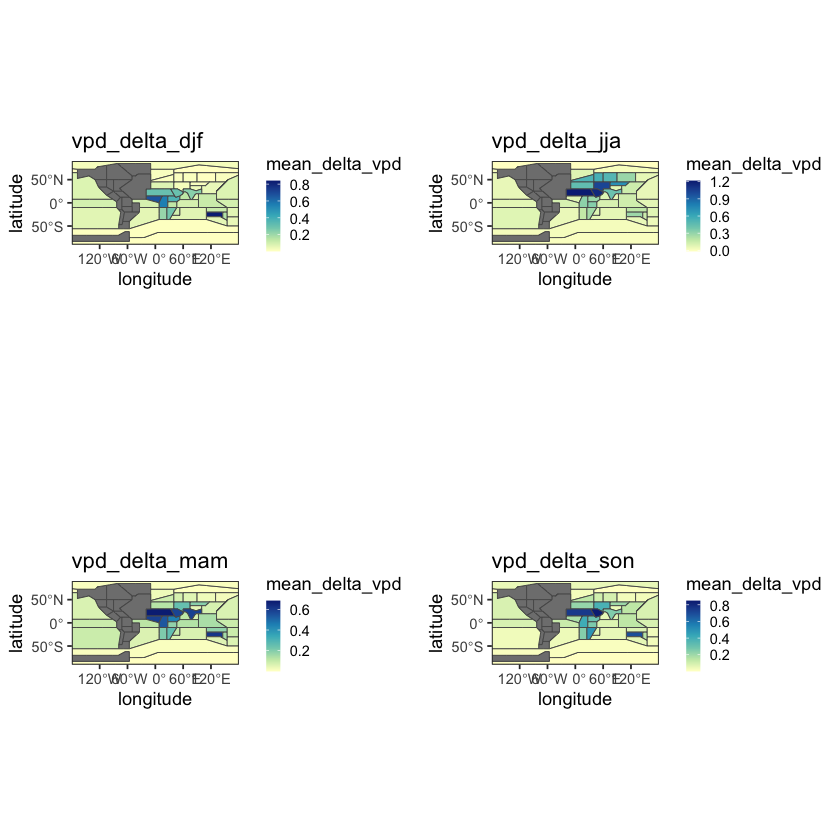

In [60]:
plot_join5 <- ggplot(data = shp_join5) +
  geom_sf(aes(fill = delta_vpd), size = 0.1) +  
  scale_fill_distiller(name = "mean_delta_vpd",
                       palette = "YlGnBu",
                       direction = 1)+
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_djf",
       x = "longitude", 
       y = "latitude") +
  theme_bw() +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))
plot_join6 <- ggplot(data = shp_join6) +
  geom_sf(aes(fill = delta_vpd), size = 0.1) +  
  scale_fill_distiller(name = "mean_delta_vpd",
                       palette = "YlGnBu",
                       direction = 1)+
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_jja",
       x = "longitude", 
       y = "latitude") +
  theme_bw() +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))
plot_join7 <- ggplot(data = shp_join7) +
  geom_sf(aes(fill = delta_vpd), size = 0.1) +  
  scale_fill_distiller(name = "mean_delta_vpd",
                       palette = "YlGnBu",
                       direction = 1)+
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_mam",
       x = "longitude", 
       y = "latitude") +
  theme_bw() +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))
plot_join8 <- ggplot(data = shp_join8) +
  geom_sf(aes(fill = delta_vpd), size = 0.1) +  
  scale_fill_distiller(name = "mean_delta_vpd",
                       palette = "YlGnBu",
                       direction = 1)+
  coord_sf(expand = FALSE) +
  labs(title = "vpd_delta_son",
       x = "longitude", 
       y = "latitude") +
  theme_bw() +
  theme(legend.position = "right", legend.key.size = unit(0.3, "cm"))
grid.arrange(plot_join5, plot_join6, plot_join7, plot_join8, ncol = 2)


In [61]:
# try to solve the grey regions
setdiff(shp_in$Name,vpd_delta_djf_grid$Name)

[1] "Greenland/Iceland"      "N.W.North-America"      "N.E.North-America"     
 [4] "W.North-America"        "C.North-America"        "E.North-America"       
 [7] "N.Central-America"      "S.Central-America"      "Caribbean"             
[10] "N.W.South-America"      "N.South-America"        "N.E.South-America"     
[13] "South-American-Monsoon" "S.W.South-America"      "S.E.South-America"     
[16] "S.South-America"        "W.Antarctica"           "N.Atlantic-Ocean"

In [65]:
#bilinear resampling
library(geojsonio)
vpd_delta_djf_br <-disagg(vpd_delta_djf, fact = 4, method = "bilinear")
shp_in_ras_br <- rasterize(vect(shp_in), vpd_delta_djf_br, field = "Name")
vpd_delta_djf_grid_br <- zonal(vpd_delta_djf_br,shp_in_ras_br,fun = "mean",na.rm = TRUE)
shp_join5 <- left_join(shp_in, vpd_delta_djf_grid_br, by = "Name")
shp_join5

Continent,Type,Name,Acronym,delta_vpd,geometry
<chr>,<chr>,<chr>,<chr>,<dbl>,<MULTIPOLYGON [°]>
POLAR,Land,Greenland/Iceland,GIC,NA,"MULTIPOLYGON (((-10 62, -10..."
NORTH-AMERICA,Land,N.W.North-America,NWN,NA,"MULTIPOLYGON (((-105 50, -1..."
NORTH-AMERICA,Land,N.E.North-America,NEN,NA,"MULTIPOLYGON (((-50 50, -50..."
NORTH-AMERICA,Land,W.North-America,WNA,NA,"MULTIPOLYGON (((-130 50, -1..."
NORTH-AMERICA,Land,C.North-America,CNA,NA,"MULTIPOLYGON (((-90 50, -90..."
NORTH-AMERICA,Land,E.North-America,ENA,NA,"MULTIPOLYGON (((-70 25, -70..."
CENTRAL-AMERICA,Land,N.Central-America,NCA,NA,"MULTIPOLYGON (((-90 25, -90..."
CENTRAL-AMERICA,Land,S.Central-America,SCA,NA,"MULTIPOLYGON (((-75 12, -75..."
CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,NA,"MULTIPOLYGON (((-75 12, -75..."
